# Kingdom Come Deliverance from Daraz

## Getting Started

We start off by defining the necessary imports for this notebook.

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates

Next, we'll mount Google Drive to load the data files while ensuring persistence of storage.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

We can now begin by loading the training data from `train.csv`.

In [ ]:
# Load training data
df = pd.read_csv("drive/MyDrive/DataCrunch/train.csv")

df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,1,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,1,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,1,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,1,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


## Exploratory Data Analysis

A good way to start off EDA is by inspecting the shape of our dataframe.

In [ ]:
# Get shape of data
df.shape

(84960, 17)

Here, we can see that our dataframe has:

1. 84,960 samples (rows)
2. 17 features (columns)

We can get more information related to the data, such as the data types of the features, missing values etc. using `df.info()`.

In [ ]:
# Get overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-null  float64
 13  R

The output of `df.info()` yields the following information:

1. We only have one categorical variable - `kingdom` i.e. the names of the kingdoms of Harveston. The rest of the variables are continuous - either integer or float.
2. There appears to be no missing values in any of the columns of the dataframe.

Additional, we can also get a **statistical summary** of our data using `df.describe()`.

In [ ]:
# Get statistical summary of data
df.describe()

,ID,Year,Month,Day,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
count,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000,84960.000000
mean,42480.500000,4.610876,6.666667,15.735876,24.003334,-37.266665,135.600751,139.735375,5.345287,6.361224,20.338598,7.723850,8.895680,15.629291,215.831297,1.568724
std,24525.983772,2.239331,3.402793,8.802867,0.798622,0.488873,133.650417,133.937168,1.977739,2.371880,4.118938,13.477186,7.231531,6.198760,93.917858,0.219856
min,1.000000,1.000000,1.000000,1.000000,22.880000,-37.729980,18.600000,18.700000,0.500000,0.800000,3.190000,0.000000,0.000000,2.300000,0.000000,0.425268
25%,21240.750000,3.000000,4.000000,8.000000,23.680003,-37.630006,26.300000,30.300000,3.800000,4.500000,18.070000,0.520000,2.000000,11.100000,119.000000,1.451614
50%,42480.500000,5.000000,7.000000,16.000000,23.780002,-37.530000,28.100000,32.500000,5.100000,6.200000,20.960000,3.380000,8.000000,15.100000,255.000000,1.589235
75%,63720.250000,7.000000,10.000000,23.000000,24.280002,-37.130006,299.350000,303.850000,6.500000,8.000000,23.300000,9.490000,15.000000,19.000000,286.000000,1.715598
max,84960.000000,8.000000,12.000000,31.000000,26.580005,-35.729980,303.650000,309.650000,15.400000,17.300000,30.100000,440.440000,24.000000,50.200000,359.000000,2.212660


An important verification we need to do is to check the unique values of the `Year`, `Month` and `Day` columns, to make sure they don't include any weird and unexpected information (e.g. a `Day` that's not between 1 and 31).

In [ ]:
date_cols = ["Year", "Month", "Day"]

for col in date_cols:
  # Retrieve list of unique values for `Year` column
  unique_values = df[col].unique()

  # Display result
  print(f"Unique values of `{col}` column: {unique_values}")

Unique values of `Year` column: [1 2 3 4 5 6 7 8]
Unique values of `Month` column: [ 4  5  6  7  8  9 10 11 12  1  2  3]
Unique values of `Day` column: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


There doesn't seem to be any unexpected anomalies in the `Year`, `Month` and `Day` columns, which means we can use them as they are to create a `Date` feature by combining them.

This `Date` feature will be the index of our data, which is crucial when working on time-series datasets.

We can also visualize the distribution of the values of the `Year` column to check for any imbalances.

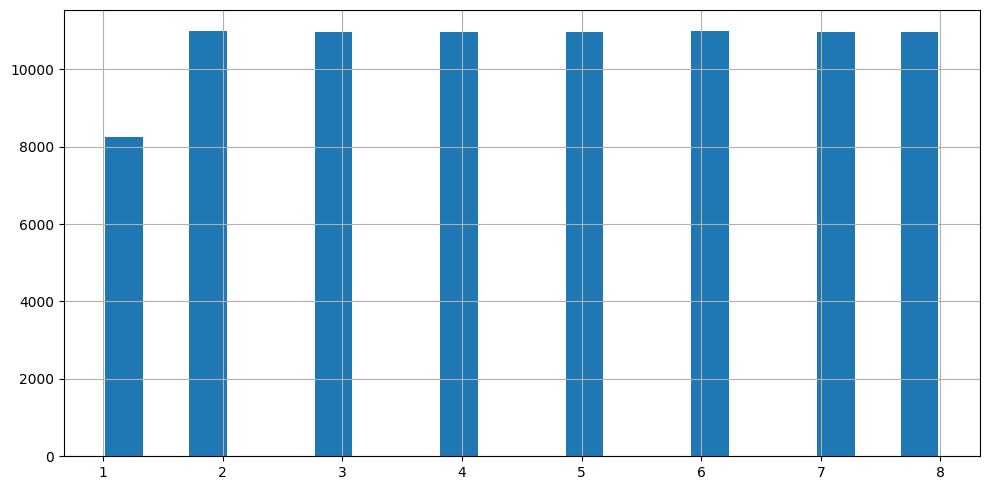

In [ ]:
# Analyze distribution of years

plt.figure(figsize=(10, 5))
df["Year"].hist(bins=20, rwidth=0.9)
plt.tight_layout()
plt.show()

The data seems to have a good balance when it comes to `Year`, except a small decrease in the number of `Year` values of 1.

Next, we'll take a look at the `kingdom` column. Specifically, what kingdoms are represented in our data.

In [ ]:
# Retrieve list of unique values for `kingdom` column
unique_values = df["kingdom"].unique()

print(f"Unique values of `kingdom` column: {unique_values}\n")
print(f"Number of unique kingdoms: {len(unique_values)}")

Unique values of `kingdom` column: ['Arcadia' 'Atlantis' 'Avalon' 'Camelot' 'Dorne' 'Eden' 'El Dorado'
 'Elysium' 'Emerald City' 'Helios' 'Krypton' 'Metropolis' 'Midgar'
 'Midgard' 'Mordor' 'Neo-City' 'Neo-Tokyo' 'Nirvana' 'Olympus' 'Pandora'
 'Rapture' 'Rivendell' 'Serenity' 'Shangri-La' 'Solara' 'Solstice'
 'Sunspear' 'Utopia' 'Valyria' 'Winterfell']

Number of unique kingdoms: 30


We can also check whether there are any imbalances in the data based on the `kingdom` by plotting a histogram for the `kingdom` column.

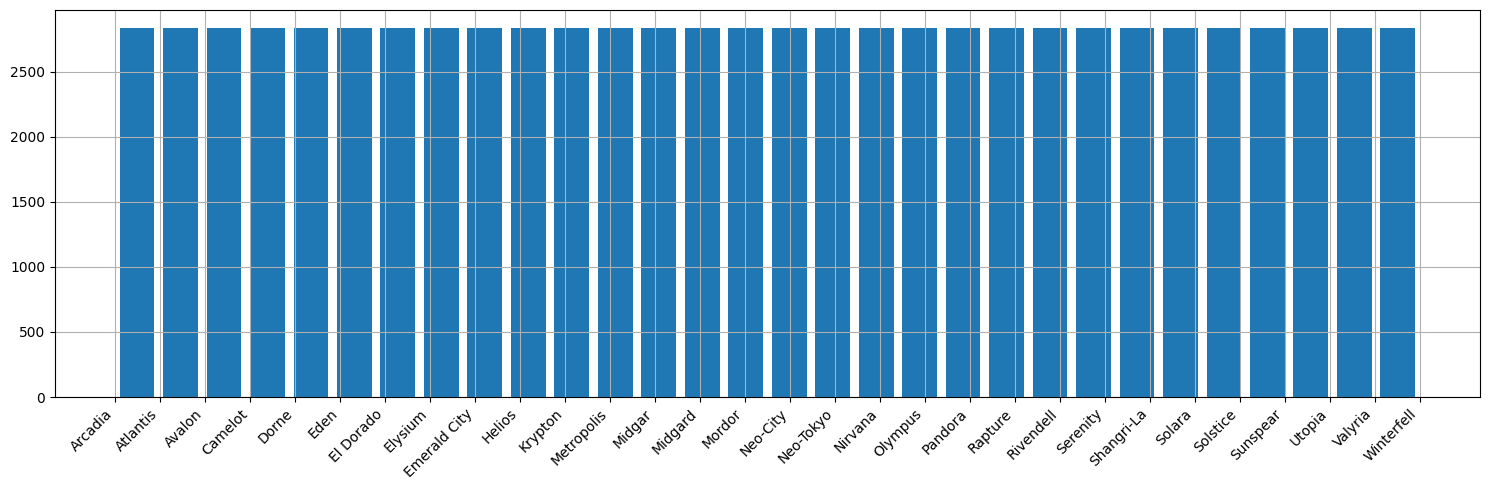

In [ ]:
# Check for imbalances in `kingdom` column via histogram

plt.figure(figsize=(15, 5))
df["kingdom"].hist(bins=30, rwidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that the dataset is perfectly balanced when considering the `kingdom` column.

Next, we'll take a look at the temperature columns.

Specifically because `Avg_Temperature` and `Avg_Feels_Like_Temperature` said to have temperature in both Celcius and Kelvin. This can be verified as follows:

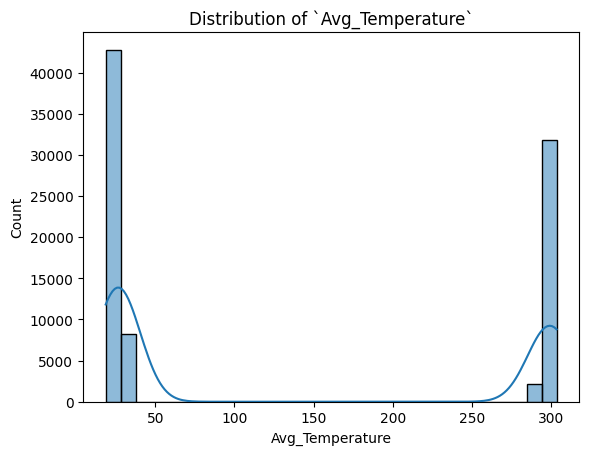

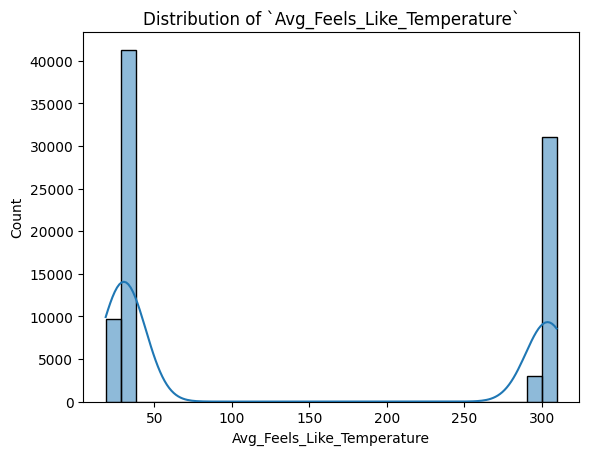

In [ ]:
# Analyze average temperature

temp_cols = ["Avg_Temperature", "Avg_Feels_Like_Temperature"]

for col in temp_cols:
  plt.figure()
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f"Distribution of `{col}`")
  plt.show()

Crazy distribution == some temps are in Kelvin, some in Celcius. Gotta fix that.

In [ ]:
# Convert all temperatures > 100 from Kelvin to Celsius

df['Avg_Temperature'] = df['Avg_Temperature'].apply(
    lambda x: x - 273.15 if x > 100 else x
)

df['Avg_Feels_Like_Temperature'] = df['Avg_Feels_Like_Temperature'].apply(
    lambda x: x - 273.15 if x > 100 else x
)

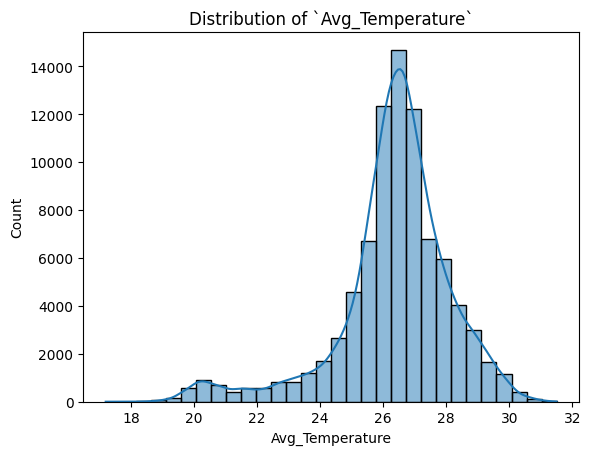

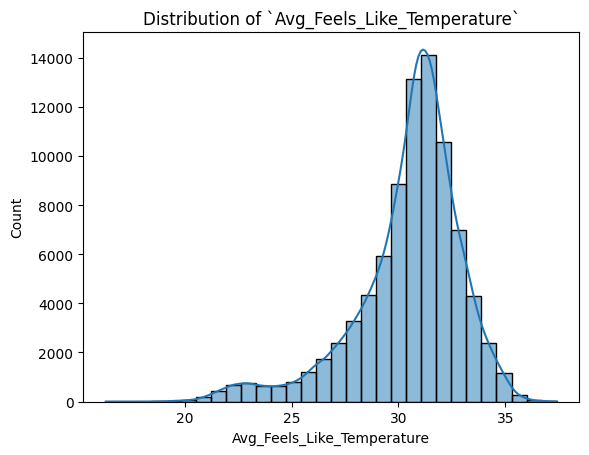

In [ ]:
# Analyze average temperature again

temp_cols = ["Avg_Temperature", "Avg_Feels_Like_Temperature"]

for col in temp_cols:
  plt.figure()
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f"Distribution of `{col}`")
  plt.show()

In [ ]:
# Define threshold value for identifying outliers
threshold = 1.5

# Iterate over the columns in the dataset
for column in df.columns:
    # Select columns that do not contain categorical data
    if df[column].dtype != "object":
        # Get first quartile
        Q1 = df[column].quantile(0.25)

        # Get third quartile
        Q3 = df[column].quantile(0.75)

        # Get IQR of particular column
        IQR = Q3 - Q1

        # Identify outliers
        outliers = df[((df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR))]

        # NOTE
        # `outliers` itself is a dataframe. Therefore, to get the number of rows
        # that are outliers, we can use `len(outliers)`

        print(f"Outliers for {column}: {len(outliers)}")

Outliers for ID: 0
Outliers for Year: 0
Outliers for Month: 0
Outliers for Day: 0
Outliers for latitude: 8496
Outliers for longitude: 8496
Outliers for Avg_Temperature: 5880
Outliers for Avg_Feels_Like_Temperature: 4769
Outliers for Temperature_Range: 1163
Outliers for Feels_Like_Temperature_Range: 303
Outliers for Radiation: 2031
Outliers for Rain_Amount: 6564
Outliers for Rain_Duration: 0
Outliers for Wind_Speed: 1989
Outliers for Wind_Direction: 0
Outliers for Evapotranspiration: 2297


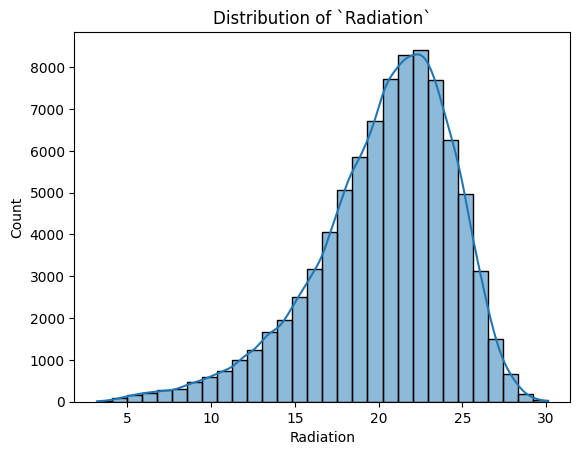

In [ ]:
plt.figure()
sns.histplot(df["Radiation"], kde=True, bins=30)
plt.title(f"Distribution of `Radiation`")
plt.show()

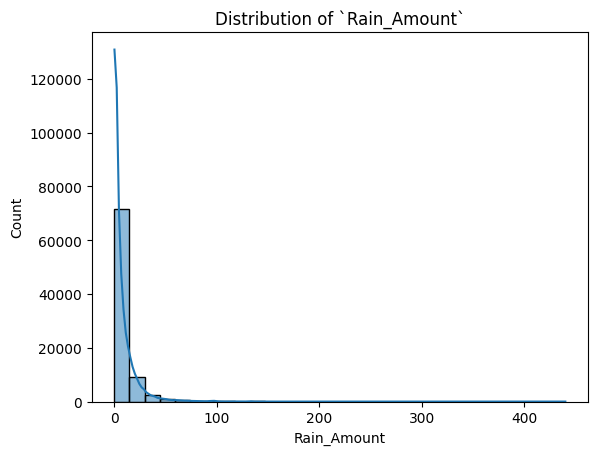

In [ ]:
plt.figure()
sns.histplot(df["Rain_Amount"], kde=True, bins=30)
plt.title(f"Distribution of `Rain_Amount`")
plt.show()

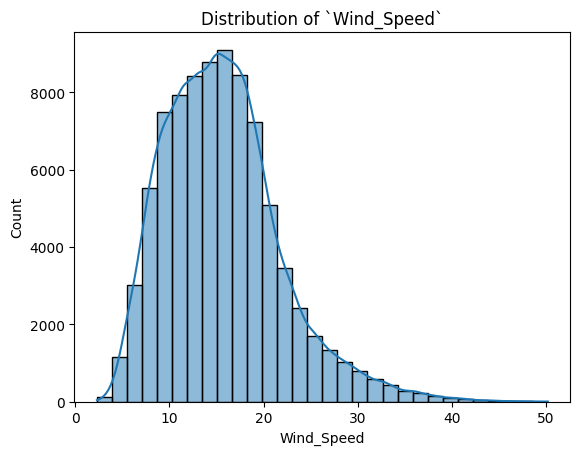

In [ ]:
plt.figure()
sns.histplot(df["Wind_Speed"], kde=True, bins=30)
plt.title(f"Distribution of `Wind_Speed`")
plt.show()

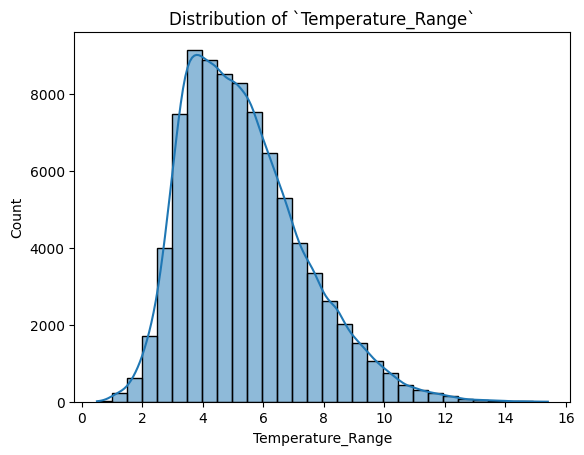

In [ ]:
plt.figure()
sns.histplot(df["Temperature_Range"], kde=True, bins=30)
plt.title(f"Distribution of `Temperature_Range`")
plt.show()

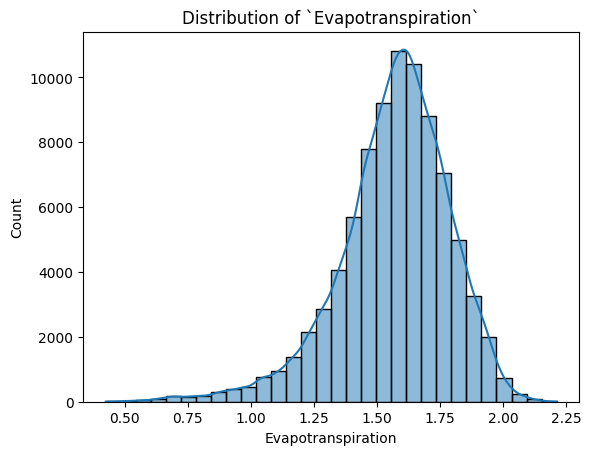

In [ ]:
plt.figure()
sns.histplot(df["Evapotranspiration"], kde=True, bins=30)
plt.title(f"Distribution of `Evapotranspiration`")
plt.show()

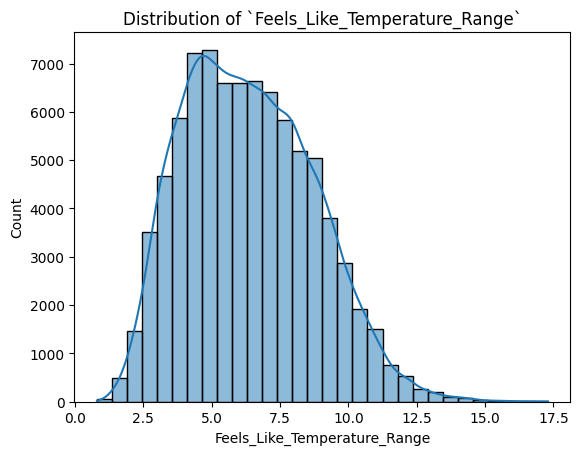

In [ ]:
plt.figure()
sns.histplot(df["Feels_Like_Temperature_Range"], kde=True, bins=30)
plt.title(f"Distribution of `Feels_Like_Temperature_Range`")
plt.show()

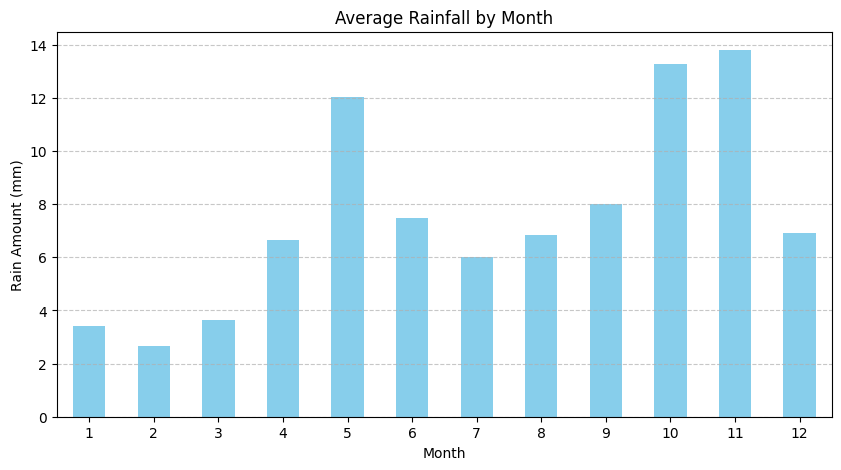

In [ ]:
# Group by Month and calculate mean rain
monthly_rain = df.groupby('Month')['Rain_Amount'].mean()

# Plot
plt.figure(figsize=(10, 5))
monthly_rain.plot(kind='bar', color='skyblue')
plt.title('Average Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Rain Amount (mm)')
plt.xticks(rotation=0)  # Keep month numbers horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

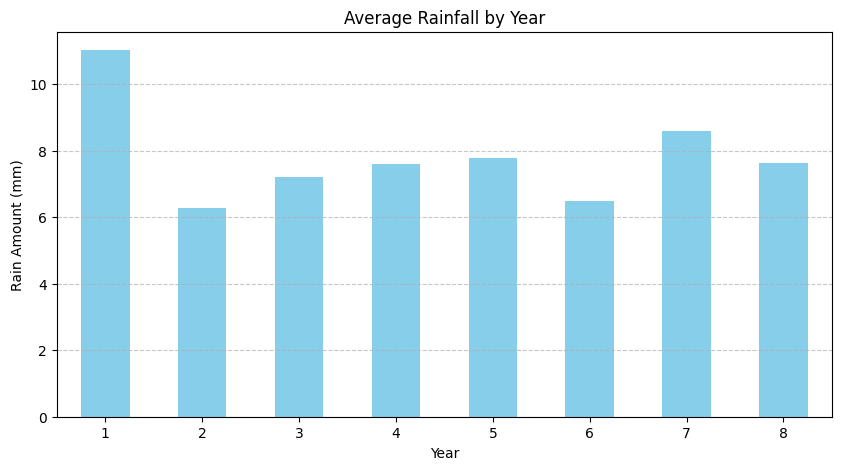

In [ ]:
# Group by Year and calculate mean rain
monthly_rain = df.groupby('Year')['Rain_Amount'].mean()

# Plot
plt.figure(figsize=(10, 5))
monthly_rain.plot(kind='bar', color='skyblue')
plt.title('Average Rainfall by Year')
plt.xlabel('Year')
plt.ylabel('Rain Amount (mm)')
plt.xticks(rotation=0)  # Keep year numbers horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Combine latitude and longitude into a single string (rounded to 4 decimal places)
df['lat_lon'] = df.apply(
    lambda row: f"{row['latitude']:.4f}_{row['longitude']:.4f}",
    axis=1
)

In [ ]:
# Count unique coordinate pairs
num_unique_locations = df['lat_lon'].nunique()
print(f"Unique locations: {num_unique_locations}")

# Show top 5 most frequent locations
print("\nTop 5 most common locations:")
print(df['lat_lon'].value_counts().head())

Unique locations: 23

Top 5 most common locations:
lat_lon
23.7800_-37.6300    11328
23.6800_-37.6300     8496
22.8800_-37.1300     5664
23.8800_-37.6300     5664
24.1800_-36.9300     2832
Name: count, dtype: int64


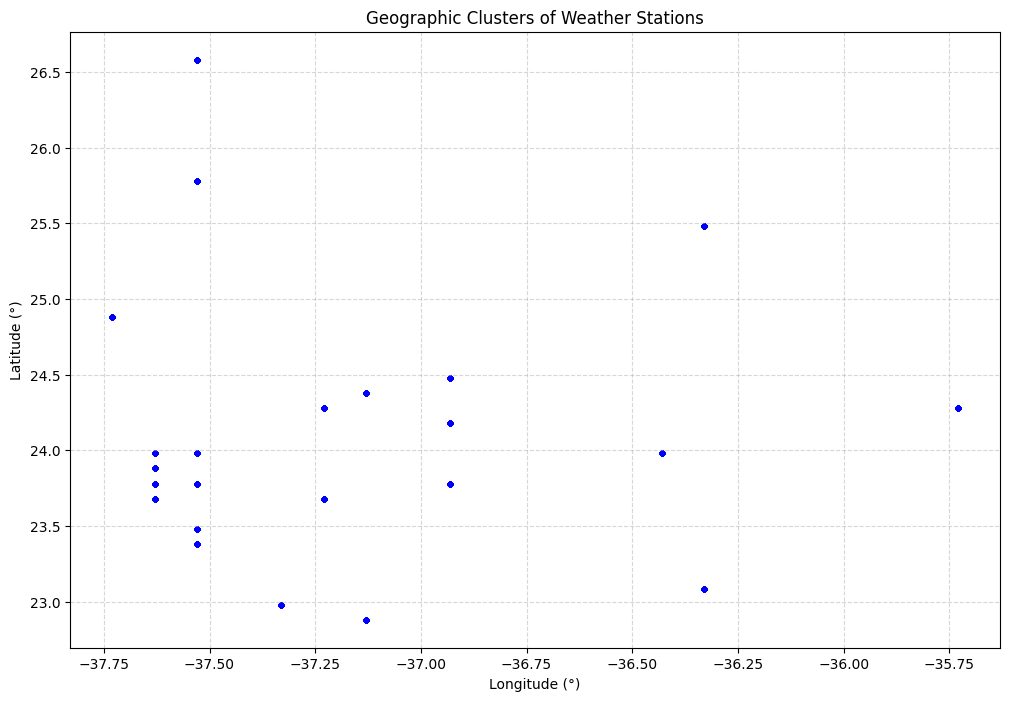

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(
    x=df['longitude'],
    y=df['latitude'],
    alpha=0.5,  # Makes dots semi-transparent
    s=10,      # Dot size
    c='blue'   # Color
)
plt.title('Geographic Clusters of Weather Stations')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

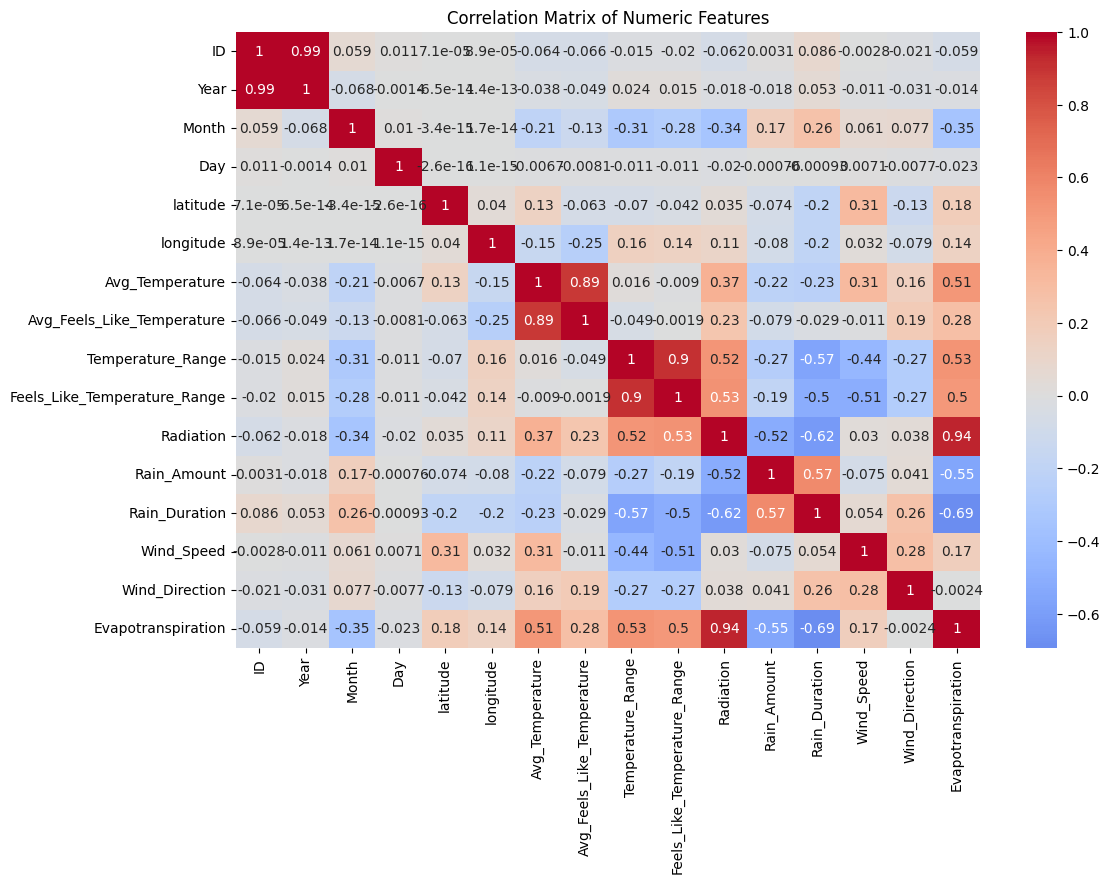

In [ ]:
# Select numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

We must also engineer a feature called `Date`, since we need a single datetime feature for time-series datasets. We can make this feature using the existing `Year`, `Month` and `Day` features.

However, since the values of `Year` are between 1 and 8, we'll set a baseline year (say, 2000) and add that to each value of the `Year` column. This way, the dates will make more sense.

In [ ]:
# Assume the earliest year is 2000
base_year = 2000

# Create `Date` feature from date information
df['Date'] = pd.to_datetime(
    (df['Year'] + base_year).astype(str) + '-' +
    df['Month'].astype(str) + '-' +
    df['Day'].astype(str),
    format='%Y-%m-%d',
    errors='coerce'  # Handle invalid dates (e.g., Feb 30)
)

df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,...,Avg_Temperature_lag7,Radiation_lag1,Radiation_lag3,Radiation_lag7,Rain_Amount_lag1,Rain_Amount_lag3,Rain_Amount_lag7,Avg_Temperature_dow_lag,Radiation_dow_lag,Rain_Amount_dow_lag
0,1,1,4,1,Arcadia,24.280002,-37.229980,25.5,30.5,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,4,1,Atlantis,22.979999,-37.329990,26.5,32.0,5.9,...,NaN,22.52,NaN,NaN,58.89,NaN,NaN,NaN,NaN,NaN
2,3,1,4,1,Avalon,22.880000,-37.130006,26.3,31.5,5.2,...,NaN,22.73,NaN,NaN,11.83,NaN,NaN,NaN,NaN,NaN
3,4,1,4,1,Camelot,24.180003,-36.929994,24.0,28.4,8.2,...,NaN,22.73,22.52,NaN,11.83,58.89,NaN,NaN,NaN,NaN
4,5,1,4,1,Dorne,25.780002,-37.530000,28.0,32.8,5.7,...,NaN,22.67,22.73,NaN,75.27,11.83,NaN,NaN,NaN,NaN


Now, we can use this new feature to plot out the distribution of the target features over time to identify **trends and seasonality**.

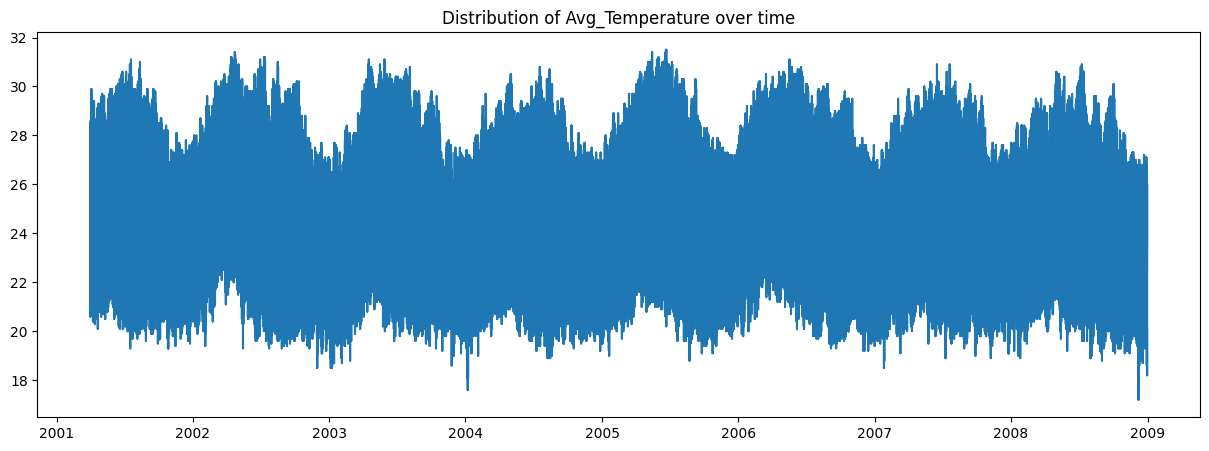

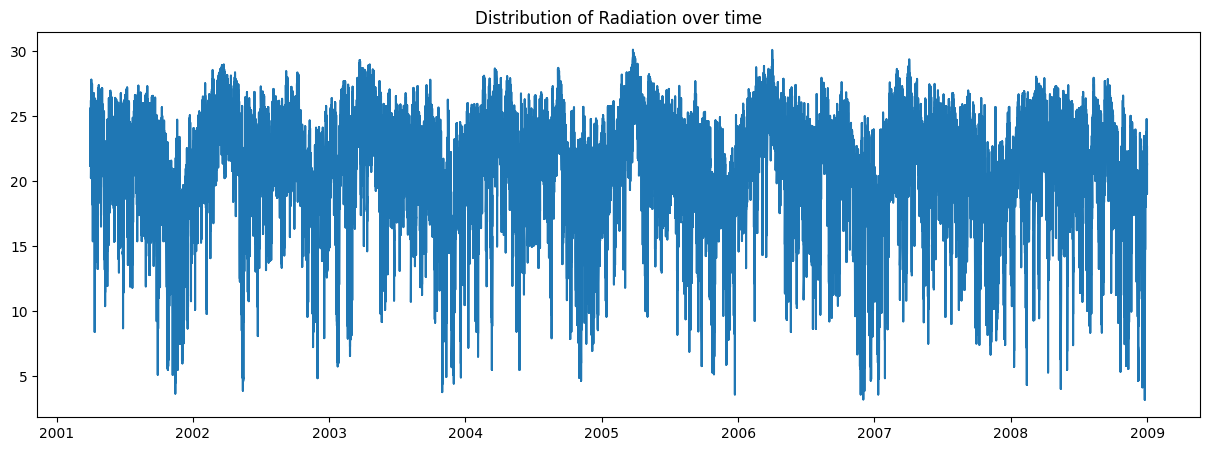

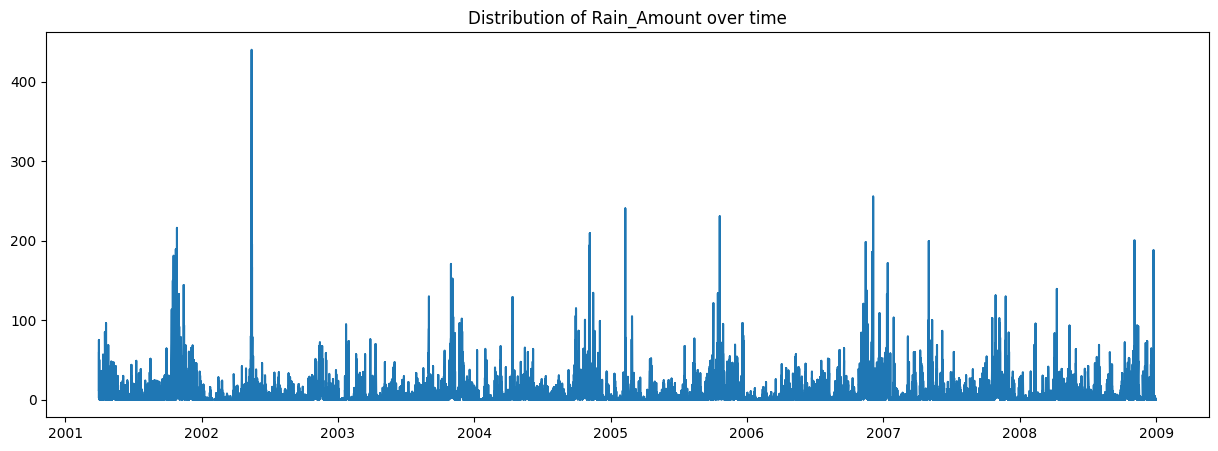

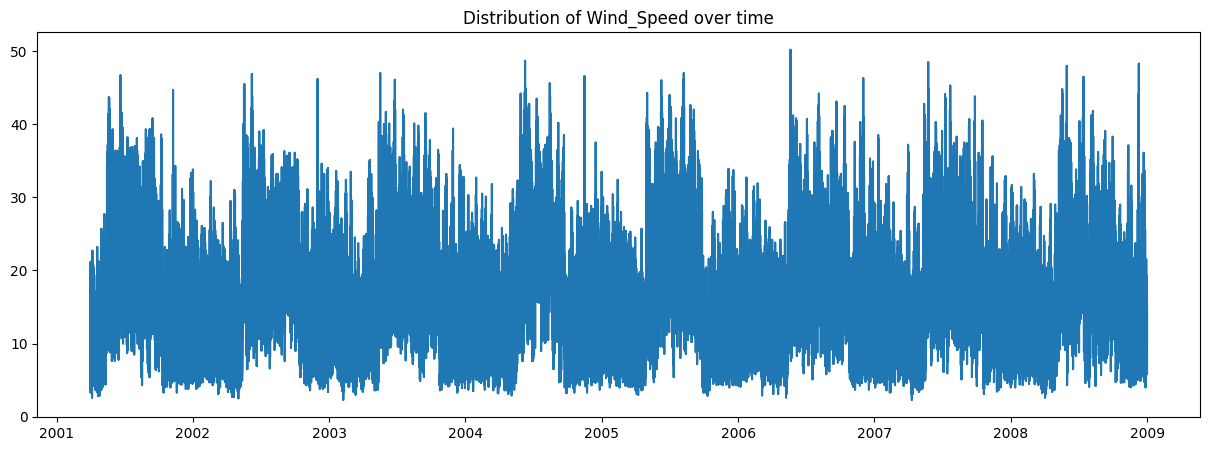

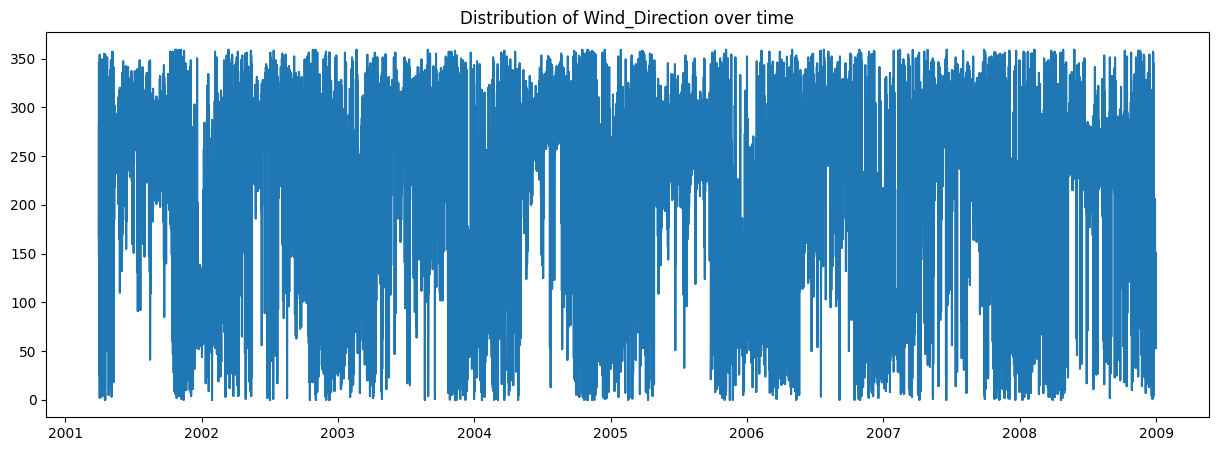

In [ ]:
targets = ["Avg_Temperature", "Radiation", "Rain_Amount", "Wind_Speed", "Wind_Direction"]

for target in targets:
  plt.figure(figsize=(15, 5))
  plt.plot(df["Date"], df[target])
  plt.title(f"Distribution of {target} over time")
  plt.show()

In [ ]:
# 3-day and 7-day moving averages for temperature
for col in ['Avg_Temperature', 'Avg_Feels_Like_Temperature']:
    df[f'{col}_ma3'] = df[col].rolling(3).mean()
    df[f'{col}_ma7'] = df[col].rolling(7).mean()

# 14-day EWMA for radiation
df['Radiation_ewma14'] = df['Radiation'].ewm(span=14).mean()

# Rolling standard deviation of temperature
df['Temperature_volatility'] = df['Avg_Temperature'].rolling(7).std()

In [ ]:
# 1, 3, 7-day lags for temperature, radiation, and precipitation
for col in ['Avg_Temperature', 'Radiation', 'Rain_Amount']:
    df[f'{col}_lag1'] = df[col].shift(1)
    df[f'{col}_lag3'] = df[col].shift(3)
    df[f'{col}_lag7'] = df[col].shift(7)

# Day-of-week lag (t-7)
for col in ['Avg_Temperature', 'Radiation', 'Rain_Amount']:
    df[f'{col}_dow_lag'] = df[col].shift(7)